# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [2]:
! git clone https://github.com/gjq2yf/assignment2.git

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 6.15 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about how to make data cleaning as easy and effective as possible with data tidying.
2. The "tidy data standard" is designed to facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together.
3. Sentence One: This sentence means that when datasets are well-organized and follow tidy principles, they share common characteristics and are easy to work with. However, messy datasets can have unique challenges and issues that need to be addressed during data preparation.
Sentence Two: This sentence means that while it's relatively easy to identify observations and variables within a specific dataset, providing a precise and universally applicable definition for these terms that covers all datasets is a challenging task due to the complexity of data in the real world.
4. Wickham defines values as either quantitative or qualitative (numbers or strings). A variable contains all values that measure the same underlying attribute. An observation contains all values measured on the same unit across attributes.
5. "Tidy data" is defined as the standard way of mapping a dataset to its structure.
6. The 5 most common problems with datasets is that column headers are values and not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. The data in Table 4 is messy because variables are stored in both rows and columns and the columns need to be converted into rows. "Melting" a dataset refers to turning columns within a dataset into rows.
7. Table 11 is messy and table 12 is tidy because in table 12 they have combined the year and day column into one date column and have ommitted the extra space where there are no values for a certain day.
8. The "chicken and egg problem" with focusing on tidy data is that if tidy data is only has useful as the tools that work with it, then tidy tools will be linked to tidy data. This means that changing data structures will not improve workflow. Wickham hopes that people will build upon tidy data to develop even better data storage strategies and better tools.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [57]:
from os import PRIO_PROCESS
import pandas as pd

#Part 1
df_airbnb = pd.read_csv('./assignment2/data/airbnb_hw.csv')
df_airbnb['Price'] = df_airbnb['Price'].str.replace(',', '').astype(float)
df_airbnb['Price'] = pd.to_numeric(df_airbnb['Price'], errors='coerce')
df_airbnb['Price'+'_nan'] = df_airbnb['Price'].isnull()
print('Total Missings: \n', sum(df_airbnb['Price'+'_nan']),'\n') # How many missing values are there?

Total Missings: 
 0 



In [58]:
#Part 2
import numpy as np
import pandas as pd
df_sharks = pd.read_csv('./assignment2/data/sharks.csv')
var1 = 'Type'
print(df_sharks[var1].unique(), '\n')
df_sharks[var1] = df_sharks[var1].replace(' ',np.nan)
print(df_sharks[var1].value_counts(), '\n')
"""In order to clean the 'Type" variable, I decided to replace missing values with .nan, and create a dummy for each qualitative type of missing
value."""

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 



<ipython-input-58-baaff5a17b0f>:4: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sharks = pd.read_csv('./assignment2/data/sharks.csv')


'In order to clean the \'Type" variable, I decided to replace missing values with .nan, and create a dummy for each qualitative type of missing\nvalue.'

In [59]:
#Part 3
url='https://raw.githubusercontent.com/DS3001/EDA/main/data/pretrial_data.csv'
df_pretrial = pd.read_csv(url,low_memory=False)
df_pretrial = df_pretrial.rename(columns = {'released':'WhetherDefendantWasReleasedPretrial'})

#replace missing values with np.nan
df_pretrial['WhetherDefendantWasReleasedPretrial'] = pd.to_numeric(df_pretrial['WhetherDefendantWasReleasedPretrial'], errors='coerce')
df_pretrial['WhetherDefendantWasReleasedPretrial'+'_nan'] = df_pretrial['WhetherDefendantWasReleasedPretrial'].isnull()

print(df_pretrial['WhetherDefendantWasReleasedPretrial'].unique(),'\n')
print(df_pretrial['WhetherDefendantWasReleasedPretrial'].value_counts(), '\n')

[nan  0.  1.] 

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [60]:
#Part 4
var2 = 'sentence_type'
df_pretrial[var2] = pd.to_numeric(df_pretrial[var2], errors='coerce')
df_pretrial[var2+'_nan'] = df_pretrial[var2].isnull()
""""I decided to change the type of data to numeric and then replace any null values with NaN."""

'"I decided to change the type of data to numeric and then replace any null values with NaN.'

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

#Part 1
df = pd.read_csv('./assignment2/data/college_completion.csv')

#Part 2
df.head()

"""The data has 3798 rows and 63 columns. There are 3798 observations and the variables included are 'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer', 'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames', 'cohort_size'."""

"The data has 3798 rows and 63 columns. There are 3798 observations and the variables included are 'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', '

In [62]:
#Part 3
crosstab = pd.crosstab(df['control'], df['level'])
print(crosstab)
"""Public schools have the highest count in the 2-year level. While private not-for-profit schools have the highest count in the 4-year level, they have the lowest count in the 2-year level. Private for-profit schools have the lowest count in the 4-year level."""

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


'Public schools have the highest count in the 2-year level. While private not-for-profit schools have the highest count in the 4-year level, they have the lowest count in the 2-year level. Private for-profit schools have the lowest count in the 4-year level.'

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


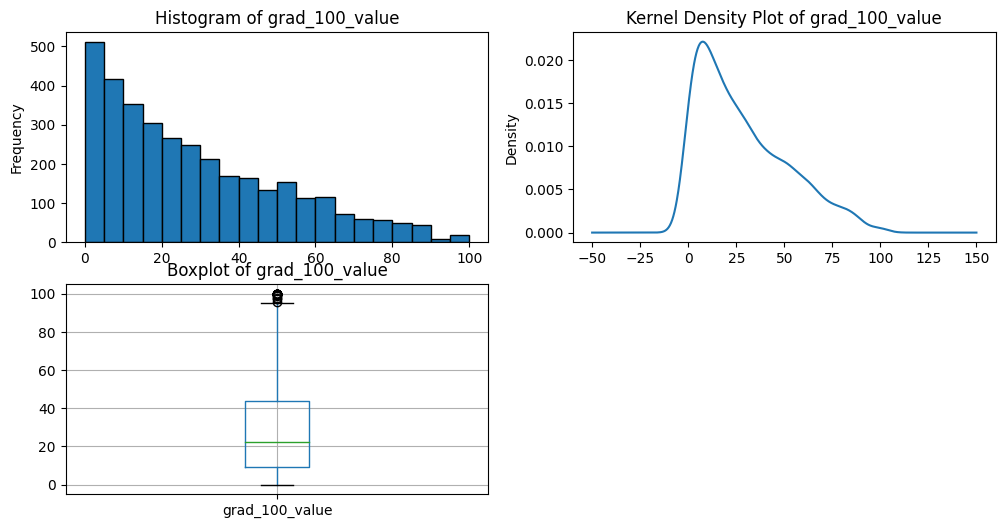

In [63]:
#Part 4
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
df['grad_100_value'].plot.hist(bins=20, edgecolor='k')
plt.title('Histogram of grad_100_value')

plt.subplot(2, 2, 2)
df['grad_100_value'].plot.kde()
plt.title('Kernel Density Plot of grad_100_value')

plt.subplot(2, 2, 3)
df.boxplot(column='grad_100_value')
plt.title('Boxplot of grad_100_value')

print(df['grad_100_value'].describe())

                                count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                    

'Private not-for-profit schools in both the 2-year and 4-year level have the greatest mean. Additionally, 2-year and 4-year private not-for-profit schools and 2-year private for-profit schools seem to have a more normal distribution than any of the other type of schools. Private not-for-profit schools seem to have the best graduation rate.'

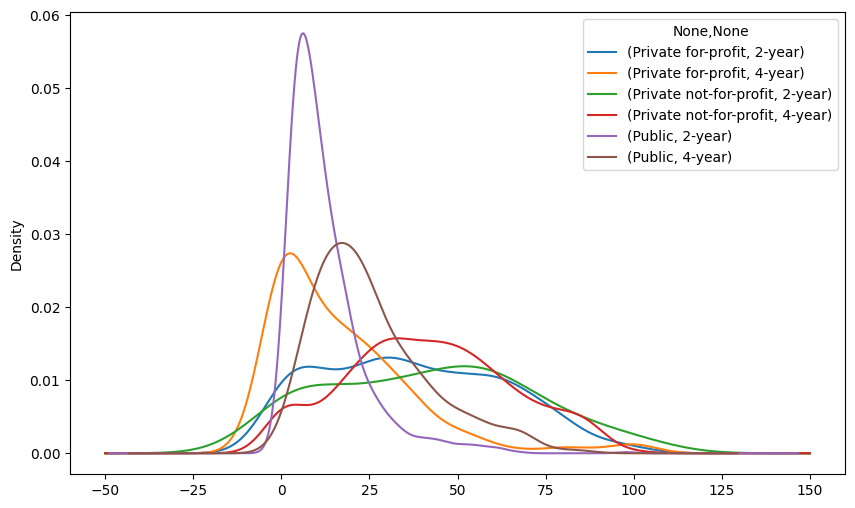

In [64]:
#Part 5
grouped_kd = df.groupby(['control', 'level'])['grad_100_value'].plot.kde(legend=True, figsize=(10, 6))
grouped_description = df.groupby(['control', 'level'])['grad_100_value'].describe()
print(grouped_description)
"""Private not-for-profit schools in both the 2-year and 4-year level have the greatest mean. Additionally, 2-year and 4-year private not-for-profit schools and 2-year private for-profit schools seem to have a more normal distribution than any of the other type of schools. Private not-for-profit schools seem to have the best graduation rate."""

                                 count       mean        std  min     25%  \
levelXcontrol                                                               
2-year, Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
2-year, Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
2-year, Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year, Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
4-year, Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
4-year, Public                   573.0  25.561082  16.403902  0.0  13.600   

                                 50%     75%    max  
levelXcontrol                                        
2-year, Private for-profit      33.9  57.800  100.0  
2-year, Private not-for-profit  44.4  61.200  100.0  
2-year, Public                   9.4  16.175   97.8  
4-year, Private for-profit      12.5  26.325  100.0  
4-year, Private not-for-profit  41.0  57.800  100.0  
4-yea

'2-year private for-profit, 2 year private not-for-profit, and 4 year private not-for-profit institutions seem to have the best graduation rates. '

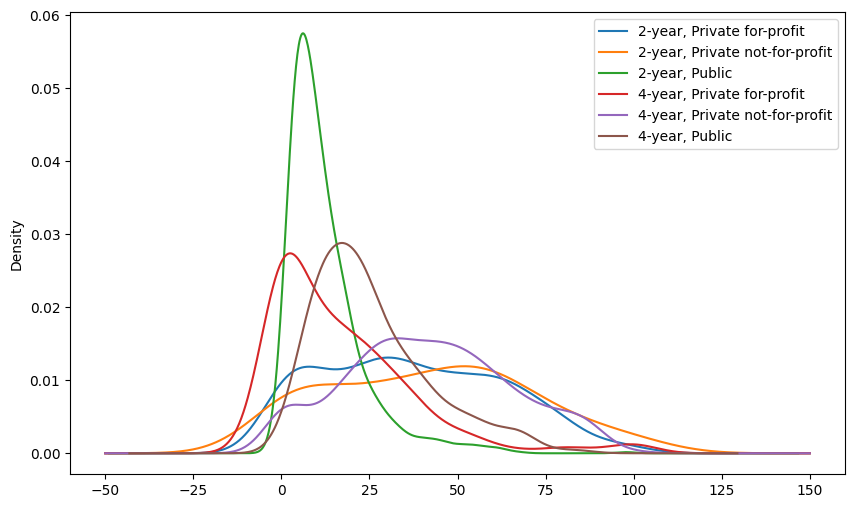

In [65]:
#Part 6
df['levelXcontrol'] = df['level'] + ', ' + df['control']
grouped_kde_level_control = df.groupby('levelXcontrol')['grad_100_value'].plot.kde(legend=True, figsize=(10, 6))
grouped_description_level_control = df.groupby('levelXcontrol')['grad_100_value'].describe()
print(grouped_description_level_control)
"""2-year private for-profit, 2 year private not-for-profit, and 4 year private not-for-profit institutions seem to have the best graduation rates. """

Description of aid_value: 
 count     3797.000000
mean      7960.445878
std       6419.658196
min        294.000000
25%       4018.000000
50%       5207.000000
75%       9343.000000
max      41580.000000
Name: aid_value, dtype: float64
Description of aid_value grouped by level and control: 
                                 count          mean          std     min  \
control                level                                               
Private for-profit     2-year   464.0   4559.681034  1286.688269   294.0   
                       4-year   527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year    68.0   5128.058824  2590.449946   934.0   
                       4-year  1180.0  14702.401695  7649.775203   902.0   
Public                 2-year   926.0   4126.199784  1260.271382   881.0   
                       4-year   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
control                level 

'From the second graph where we grouped the insitutions by level and control we can see that the somewhat bimodal nature of the graph can be explained by the aid_value of private not-for-profit insitutions.'

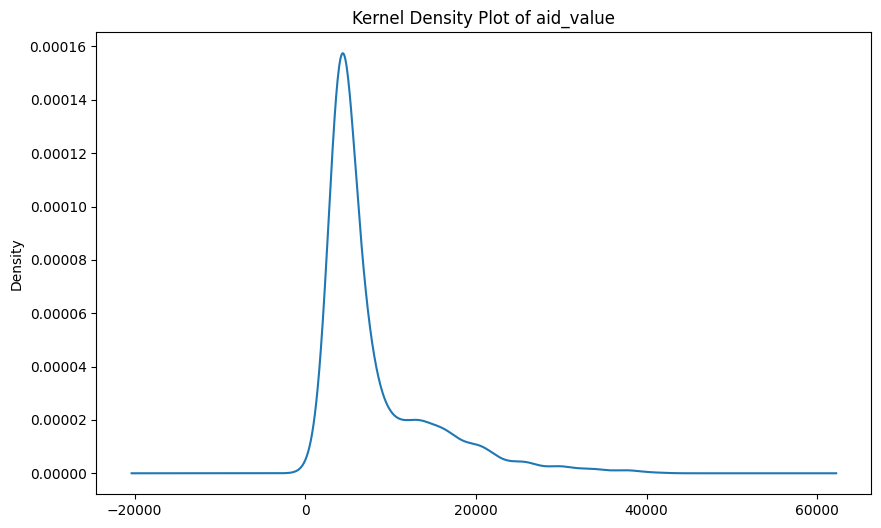

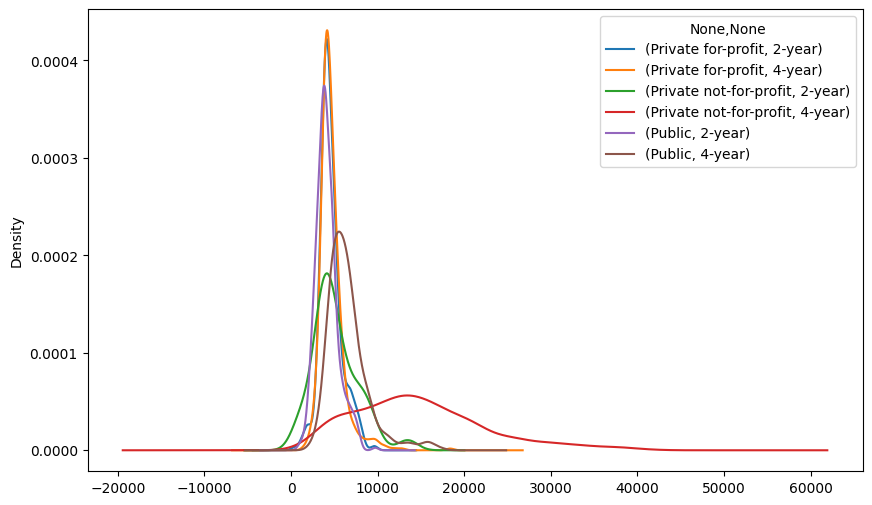

In [66]:
#Part 7
plt.figure(figsize=(10, 6))
df['aid_value'].plot.kde()
plt.title('Kernel Density Plot of aid_value')
description_aid = df['aid_value'].describe()
print("Description of aid_value: \n", description_aid)

plt.figure(figsize=(10,6))
df.groupby(['control', 'level'])['aid_value'].plot.kde(legend=True)
grouped_description_aid = df.groupby(['control', 'level'])['aid_value'].describe()

print("Description of aid_value grouped by level and control: \n", grouped_description_aid)
"""From the second graph where we grouped the insitutions by level and control we can see that the somewhat bimodal nature of the graph can be explained by the aid_value of private not-for-profit insitutions."""

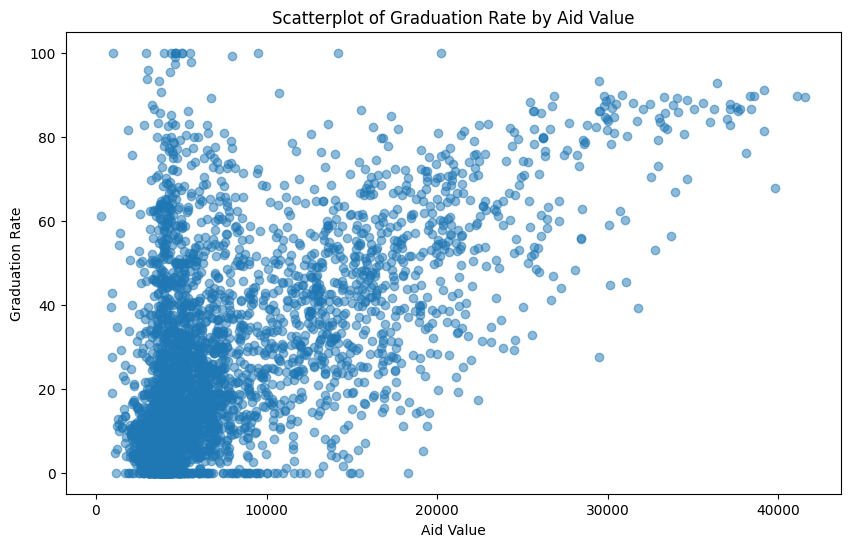

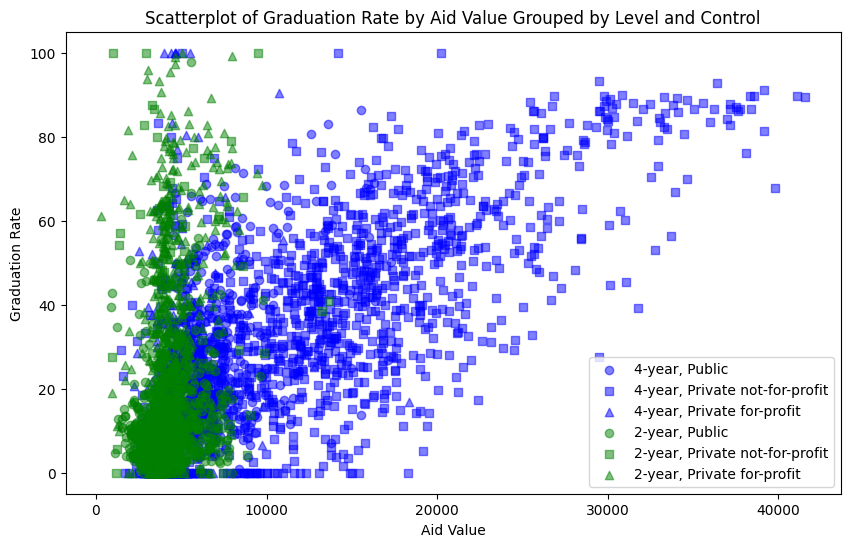

'It seems that for all of the 2 year insitutions the aid value stays somewhat the same while the graduation rate increases. However, for 4 year private nor-for-profit institutions as aid increases so does the graduation rate.'

In [67]:
#Part 8
#Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(10, 6))
plt.scatter(df['aid_value'], df['grad_100_value'], alpha=0.5)
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate')
plt.title('Scatterplot of Graduation Rate by Aid Value')
"""It seems as if there is somewhat of a positive relationships between aid and graduation rate. However, there are a lot of data points that also show that aid stays the same as graduation rate increases."""

#Scatterplot of grad_100_value by aid_value grouped my level and control (did this using some help from generated AI)
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']
markers = ['o', 's', '^']
for i, level in enumerate(df['level'].unique()):
    for j, control in enumerate(df['control'].unique()):
        subset = df[(df['level'] == level) & (df['control'] == control)]
        plt.scatter(subset['aid_value'], subset['grad_100_value'], marker=markers[j], color=colors[i], alpha=0.5, label=f'{level}, {control}')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate')
plt.title('Scatterplot of Graduation Rate by Aid Value Grouped by Level and Control')
plt.legend()
plt.show()
"""It seems that for all of the 2 year insitutions the aid value stays somewhat the same while the graduation rate increases. However, for 4 year private nor-for-profit institutions as aid increases so does the graduation rate."""

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.